In [14]:
import numpy as np
import torch

torch.__version__

'1.10.2'

In [1]:
# Import required libraries
import pandas as pd
import src.classify_generic as cg
import src.format_data as fd
import src.tool_functions as dlbclass
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
####################################
#  *** Change variables here! ***  #
#   Afterwards, run all cells via  #
#     menu: Cell -> Run All        # 
####################################

# Replace gsm_file with your GSM file name to classify your own data
gsm_file = './gsm/DLBCL_testset_gsm.tsv'

# Set your cohort name
cohort = 'testset'

In [3]:
############################################
# No need to modify cells below this point #
############################################

In [4]:
classified_samples = dlbclass.classify_samples(gsm_file, cohort)
classified_samples

Predictions will be written to:

 ./classifications/testset_classified_samples.tsv


,C1,C2,C3,C4,C5,Confidence,PredictedCluster
sample,,,,,,,
DLBCL11572,0.004164,0.007046,0.973578,0.011075,0.004137,0.973578,C3
DLBCL_RICOVER_99,0.082979,0.031134,0.009259,0.020035,0.856593,0.856593,C5
DLBCL_C_D_1132_NULLPAIR,0.191042,0.013594,0.044699,0.608126,0.142539,0.608126,C4
DLBCL_LS4085,0.014521,0.068145,0.092188,0.053822,0.771323,0.771323,C5
DLBCL_RICOVER_224,0.010460,0.148672,0.017777,0.024433,0.798658,0.798658,C5
...,...,...,...,...,...,...,...
DLBCL_C_D_PAIR20,0.016655,0.280063,0.146509,0.019758,0.537015,0.537015,C5
DLBCL_C_D_PAIR22,0.093511,0.604602,0.249694,0.032911,0.019281,0.604602,C2
DLBCL_C_D_PAIR23,0.241391,0.512314,0.016246,0.036158,0.193892,0.512314,C2


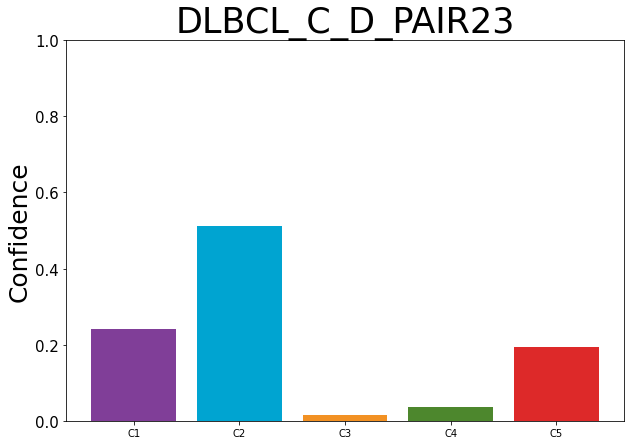

In [9]:
###########################################################
#              Individual sample bar plots.               #
# Replace sample = '...' with the sample you want to see. #
###########################################################

# Change this here, and rerun this cell with the '>Run' button.
sample = 'DLBCL_C_D_PAIR23'
#


dlbclass.plot_sample_barplot(sample, classified_samples)